### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [76]:
# Install required packages for sentimental analysis project

In [77]:
!pip install tweepy

In [78]:
!pip install textblob

In [79]:
!pip install wordcloud

In [80]:
!pip install nltk

In [81]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [82]:
# Step- 1: Load the Dataset and Read the data from the given dataset

In [83]:
omicron_data = pd.read_csv("/content/Twitter_Omicron_data_1_1_1_1_1 (1).csv")
omicron_data.head()

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1


In [84]:
# Step- 2: Perform EDA for above dataset and find the abnormalities and distinguish the categorical and numerical data individually

In [85]:
omicron_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [86]:
cat_data = omicron_data.select_dtypes(include = 'object')
cat_data.head()

,tweets,time
0,6 big questions about new Omicron-targeting bo...,2023-03-09 18:24:06
1,I'm confused https://t.co/NyfgdYUYAT,2023-03-09 18:23:43
2,Long COVID less likely after Omicron than afte...,2023-03-09 18:22:43
3,The finding don't tally with the high numbers ...,2023-03-09 18:21:45
4,A conference abstract from the European Congre...,2023-03-09 18:21:45


In [87]:
num_data = omicron_data.select_dtypes(include = 'int64')
num_data.head()

,likes,retweet_count
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [88]:
num_data.isnull().sum()

,0
likes,0
retweet_count,0


<Axes: >

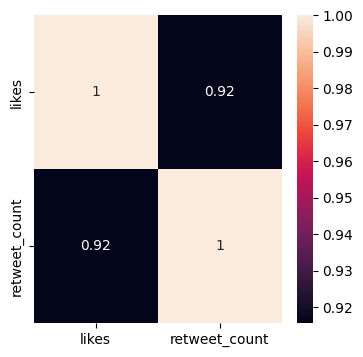

In [89]:
plt.figure(figsize = (4,4))
sns.heatmap(num_data.corr(), annot = True)

In [90]:
num_data['followers'] = num_data.groupby('likes')['retweet_count'].transform(lambda x: x.fillna(x.mean()))
num_data

,likes,retweet_count,followers
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
6993,1,0,0
6994,0,0,0
6995,0,0,0
6996,1,0,0


In [91]:
# Step- 3: Convert categorical data using hypotesis testing and find best data

In [92]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

encoded_data = cat_data.apply(LabelEncoder().fit_transform)
encoded_data.head()

,tweets,time
0,383,6912
1,5157,6911
2,5466,6910
3,6207,6909
4,4419,6909


In [93]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tweets  6998 non-null   int64
 1   time    6998 non-null   int64
dtypes: int64(2)
memory usage: 109.5 KB


In [94]:
best_estimators = SelectKBest(score_func = chi2, k = 2)
fit = best_estimators.fit(encoded_data, num_data['followers'])

In [95]:
fit.scores_

array([321352.77628604,  85961.02065427])

In [96]:
#Step 4: Add API interface with twitter

In [102]:
import requests

BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAHIdxAEAAAAAXSbo42lJ00gxZnaA1fXE5Qr%2Fdwg%3DBINHZs4oeQM3bv7H5RhGohV8opcK1uCGf1obSzbG8a1lYpkI6a"

def fetch_tweets_v2(keyword, count):
    url = f"https://api.twitter.com/2/tweets/search/recent?query={keyword}&max_results={min(count, 100)}"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code}, {response.text}")
    tweets = response.json()
    return pd.DataFrame([{"Tweet": tweet["text"]} for tweet in tweets.get("data", [])])

# Example: Fetch 100 tweets about Omicron
tweets_df = fetch_tweets_v2("Omicron", 100)
print(tweets_df.head())

Exception: Request failed: 429, {"title":"Too Many Requests","detail":"Too Many Requests","type":"about:blank","status":429}

In [49]:
#Step 5: Data Cleaning and Pre processing

In [50]:
# Remove URLs, special characters, and stopwords
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stop_words])
    return text

omicron_data['Cleaned_Tweet'] = omicron_data['tweets'].apply(clean_text)
omicron_data.head()

,tweets,likes,time,retweet_count,Cleaned_Tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions new omicrontargeting boosters ...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely omicron original virus ...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,finding dont tally high numbers see ons bullet...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,conference abstract european congress clinical...


In [51]:
#Step 6: PErform EDA for cleaned data

                                                    Tweet
count                                                 100
unique                                                 19
top     RT @NiONiPardon: 🔴 DEVOIR DE MÉMOIRE\n\n12/202...
freq                                                   82
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes
None


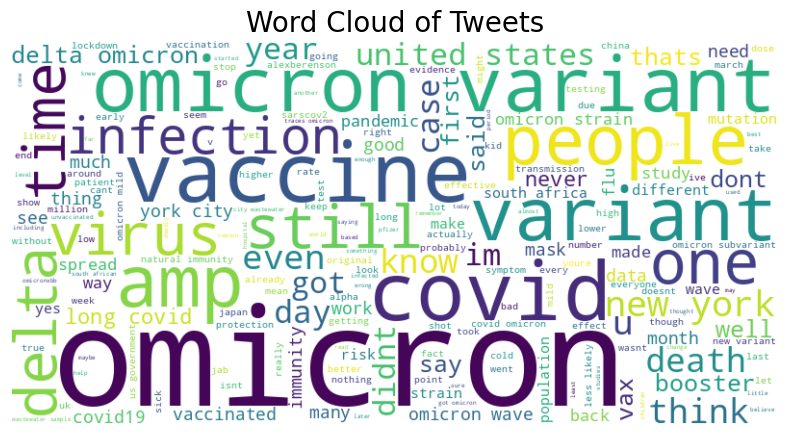

In [53]:
# Basic EDA
print(tweets_df.describe())
print(tweets_df.info())

# Word Cloud
all_words = " ".join(text for text in omicron_data['Cleaned_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets", fontsize=20)
plt.show()

In [54]:
#Step- 7: Sentiment Labeling

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_Label
Positive    2701
Negative    2686
Neutral     1611
Name: count, dtype: int64


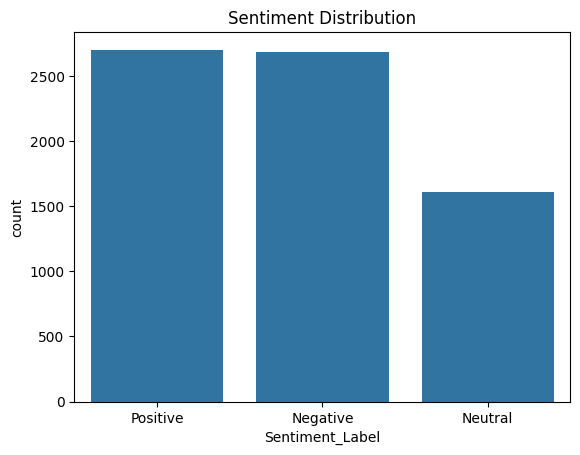

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Assign sentiment scores
omicron_data['Sentiment'] = omicron_data['Cleaned_Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
omicron_data['Sentiment_Label'] = omicron_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

print(omicron_data['Sentiment_Label'].value_counts())
sns.countplot(x='Sentiment_Label', data=omicron_data)
plt.title("Sentiment Distribution")
plt.show()

In [58]:
#Step 8 : Slpitting data into train and test using TfidVectorizer

In [59]:
X = omicron_data['Cleaned_Tweet']
y = omicron_data['Sentiment_Label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [60]:
#Step 9: Model Building and Evaluation

In [68]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100,"%")

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.76      0.73       547
     Neutral       0.80      0.64      0.71       316
    Positive       0.72      0.76      0.74       537

    accuracy                           0.73      1400
   macro avg       0.74      0.72      0.73      1400
weighted avg       0.73      0.73      0.73      1400

Accuracy Score: 73.07142857142857 %


In [69]:
#Plot the ROC curve and Confusion matrix

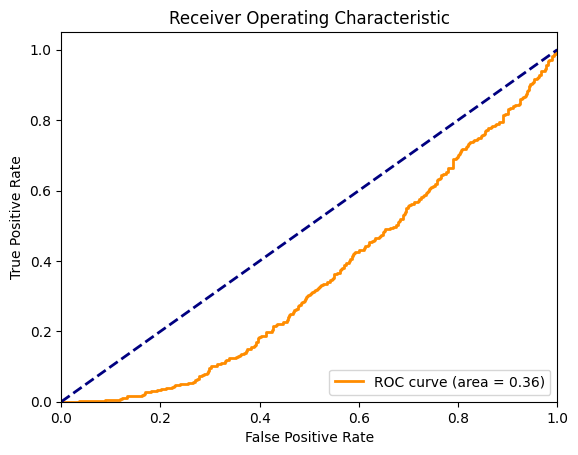

In [71]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Positive') # Assuming 'Positive' is your positive class label
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

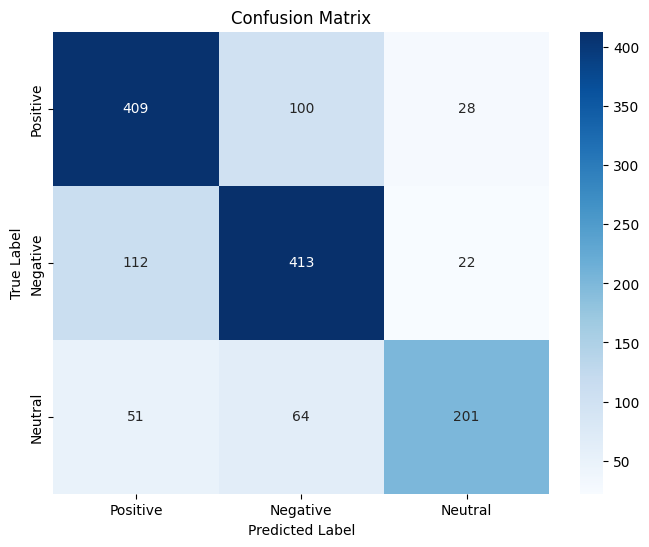

In [103]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral']) # Assuming these are your labels

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
#Step 10: Real time sentiment analysis

In [75]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Replace 'YOUR_BEARER_TOKEN' with your actual Bearer Token from Twitter Developer Portal
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAHIdxAEAAAAAHwKGmU6tArf0IKuRwImdkV5TaAg%3DmefcoY4dHhKQmypG2Hr5SdiMUlR9aCrc4AzHYbhEQxaZbrJUKj"

# Clean tweet text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stop_words])
    return text

# Function to fetch tweets using Twitter API v2
def fetch_tweets_v2(keyword, count):
    url = f"https://api.twitter.com/2/tweets/search/recent?query={keyword}&max_results={min(count, 100)}"
    headers = {"Authorization": f"Bearer {BEARER_TOKEN}"}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code}, {response.text}")

    tweets = response.json()
    return pd.DataFrame([{"Tweet": tweet["text"]} for tweet in tweets.get("data", [])])

# Real-time sentiment analysis
def analyze_realtime_sentiments(keyword, count):
    realtime_tweets = fetch_tweets_v2(keyword, count)
    realtime_tweets['Cleaned_Tweet'] = realtime_tweets['Tweet'].apply(clean_text)
    realtime_tweets['Sentiment'] = realtime_tweets['Cleaned_Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])
    realtime_tweets['Sentiment_Label'] = realtime_tweets['Sentiment'].apply(
        lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
    )
    return realtime_tweets

# Example: Analyze real-time tweets
realtime_results = analyze_realtime_sentiments("Omicron", 50)
pd.DataFrame(realtime_results)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Exception: Request failed: 429, {"title":"Too Many Requests","detail":"Too Many Requests","type":"about:blank","status":429}